In [232]:
# from sklearn import linear_model
lin_reg = linear_model.LinearRegression()
# lin_reg1 = linear_model.LinearRegression()
# lin_reg2 = linear_model.LinearRegression()
# lin_reg3 = linear_model.LinearRegression()

In [10]:
# limit = -1
# prices = [float(i) for i in train[1:limit, -1]]
# squares = [float(i) for i in train[1:limit, -4]]
# x_test = [[i] for i in squares]
# y_test = prices

from sklearn.model_selection import train_test_split
import json

X = []
Y = []

with open('output.jl', 'rb') as f:
    for l in f:
        item = json.loads(l)
        currentArray = []
        currentArray.append(item['floor'])
        currentArray.append(item['number_of_floors'])
        currentArray.append(item['area']['total'])
        currentArray.append(item['location']['latitude'])
        currentArray.append(item['location']['longitude'])
        currentArray.append(item['apt_state'])
        
        X.append(currentArray)
        
        Y.append(float(item['price']['amount']))

# lin_reg0.fit(X, Y)
# lin_reg1.fit([[a[0], a[0] * a[0]] for a in X], Y)
# lin_reg2.fit([(a[0], a[0] * a[0], a[0] * a[0] * a[0]) for a in X], Y)
# lin_reg3.fit([(a[0], a[0] * a[0], a[0] * a[0] * a[0], a[0] * a[0] * a[0] * a[0]) for a in X], Y)

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=0)
# print(len(X))
# print(len(X_train))
# logcv_reg.fit(X, Y)

# print(set(map(lambda x  : (x[0] , list(X).count(x)) , X)))

[61.4,
 41.6,
 30.9,
 87,
 36,
 89.7,
 58.6,
 80,
 60.3,
 44.6,
 66.8,
 30.2,
 64.9,
 66.8,
 38,
 600,
 50,
 79.1,
 99,
 50,
 94.6,
 64,
 107.9,
 60,
 47,
 50.5,
 64.6,
 60.7,
 62,
 46,
 62.9,
 85.5,
 61.8,
 53.5,
 67.5,
 68.9,
 76.7,
 141.5,
 97.7,
 276.8,
 54,
 102.2,
 58.8,
 48.6,
 65.2,
 98.9,
 131.1,
 114.1,
 48.4,
 58.8,
 41.5,
 66.1,
 41.9,
 58,
 63,
 65.1,
 49.8,
 58.9,
 66.5,
 84,
 41.9,
 74,
 97.5,
 91.3,
 33.1,
 46.6,
 58,
 29.5,
 57.4,
 116,
 87,
 60,
 64,
 43,
 77,
 87.5,
 52.1,
 49.5,
 52.6,
 71,
 75,
 49.8,
 77.2,
 119,
 63,
 108,
 112.3,
 44.8,
 71,
 58.5,
 48.3,
 43,
 108,
 52.7,
 78,
 51.6,
 39.9,
 52.4,
 77.5,
 59]

In [2]:
from catboost import CatBoostRegressor

# dataset = numpy.array([[1,4,5,6],[4,5,6,7],[30,40,50,60],[20,15,85,60]])
# train_labels = [1.2,3.4,9.5,24.5]

X_train, X_validation, y_train, y_validation = train_test_split(X, Y, train_size=0.85, random_state=1234)

# model_01 = CatBoostRegressor(learning_rate=0.1, iterations=1000, depth=6, loss_function='RMSE', logging_level='Silent')
# fit_model01 = model_01.fit(X, Y)


# model_001_350iter = CatBoostRegressor(learning_rate=0.01, iterations=350, depth=6, loss_function='RMSE', logging_level='Silent')
# ^ - zaebis
# model_001_350iter = CatBoostRegressor(learning_rate=0.01, iterations=350, depth=6, loss_function='RMSE', logging_level='Silent')
# model_001_iter = CatBoostRegressor(learning_rate=0.01, iterations=1000, depth=6, loss_function='RMSE', logging_level='Silent')

model_001_cv = CatBoostRegressor(learning_rate=0.01, iterations=700, depth=6, loss_function='RMSE', logging_level='Silent')

model_001_cv.fit(X, Y)

model_001_cv.save_model("fitted_model")

# model_001_cv = CatBoostRegressor().load_model("zaebis_model")

# fit_model001_cv = model_001_cv.fit(X_train, y_train, eval_set=(X_validation, y_validation), plot=True)


# for i in range(16):
#     print(i)
#     model_cv = CatBoostRegressor(learning_rate=0.01, iterations=1000, depth=i, loss_function='RMSE', logging_level='Silent')
#     model_cv.fit(X_train, y_train, eval_set=(X_validation, y_validation), plot=True)

/Users/henadzit/workspace/flatiko/flatico/regression/env/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [25]:
import numpy as np

# for i in range(30):
#     print(50 + i)
#     print(lin_reg.predict([[50 + i]]))
#     print(fit_model_001_1000iter.predict([[50 + i]]))
#     print(fit_model_001_350iter.predict([[50 + i]]))
#     print("\n")

print(model_001_cv.predict([[2, 9, 40, 53.928447, 27.429269, 1]])) # pawtet
print(model_001_cv.predict([[2, 5, 45, 53.908681, 27.572759, 3]])) # plowad popedi
print(model_001_cv.predict([[2, 5, 45, 53.925432, 27.556400, 2]])) # bulvar

points = []
for lat in np.arange(53.80, 54.0, 0.01):
    for long in np.arange(27.45, 27.75, 0.01):
        points.append([lat, long, model_001_cv.predict([[3, 9, 40, lat, long, 3]])[0]])

with open('points.txt', 'w') as f:
    f.write(str(points))

[50405.87550458]
[72355.3475255]
[71193.70183135]


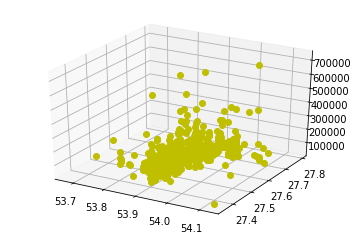

In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.gca(projection='3d')

# x = [a[2] for a in x_test]
# y = y_test

# fit = np.polyfit(x, y, 1)
# fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

# plt.xlim(20, 150.0)
# plt.ylim(0, 200000)


# fit_model_001_350iter


plt.plot([a[3] for a in X], [a[4] for a in X], Y, 'yo')#, '--k')
# plt.plot(X, [lin_reg0.predict([a]) for a in X], 'yo')
# plt.plot(X, [lin_reg1.predict([[a[0], a[0] * a[0]]]) for a in X], 'ro')
# plt.plot(X, [lin_reg2.predict([[a[0], a[0] * a[0], a[0] * a[0] * a[0]]]) for a in X], 'go')
# plt.plot([b[1] for b in X], [fit_model_001_1000iter.predict([a]) for a in X], 'bo')
# plt.plot(X, [fit_model_001_1000iter.predict([a]) for a in X], 'go')
# plt.show()

# plt.clf()
# plt.scatter(x, y, color='black', zorder=20)





In [33]:
import sklearn.datasets as datasets
datasets.load_boston()

{'DESCR': "Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per

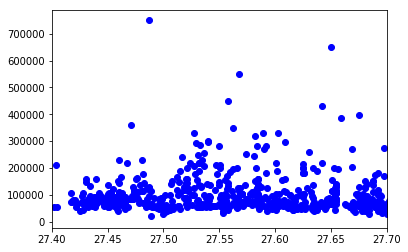

In [219]:
plt.xlim(27.4, 27.7)
plt.plot([a[4] for a in X], Y, 'bo')#, '--k')

In [ ]:
import matplotlib.pyplot as plt

n_bins = 20
fig, axs = plt.subplots(100, 250, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg

countX = [a[2] for a in X]
countX = countX[0:10]

for idx, val in enumerate(set(map(lambda x  : (x , list(countX).count(x)) , countX))):
    axs[int(val[0])].hist(val[1], bins=n_bins)
